In [ ]:
import math
import matplotlib.pyplot as plt

In [ ]:
def B(p, c, a):
  return .5*p*c*a

def ap(a,y,T,p,alpha):
  return p*(1-a*y/T)**alpha

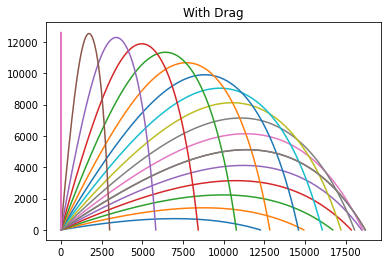

65997.52381948764


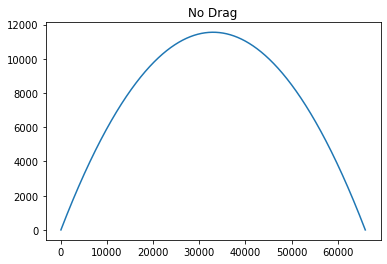

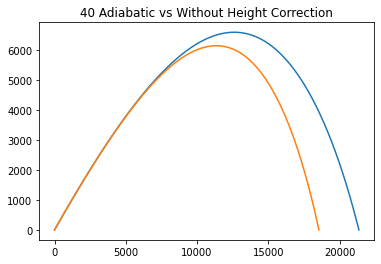

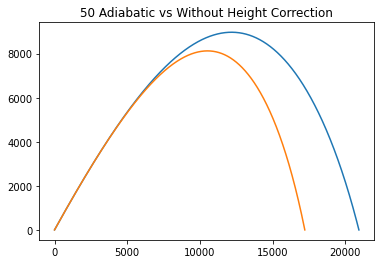

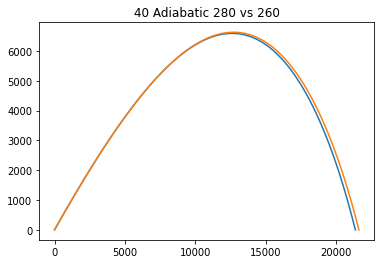

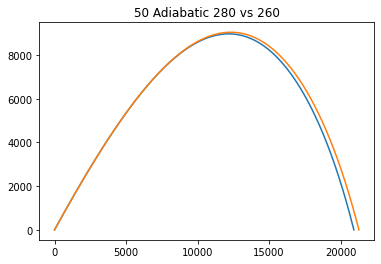

35


In [ ]:
mass = 43
diameter = float(.155)
dragC = 0.25
Vo = 830
row = 1.29
theta = math.radians(10)
area = (diameter * .5)**2 * math.pi
g = 9.81

Vx = Vo*math.cos(theta)
Vy = Vo*math.sin(theta)
V = math.sqrt(Vx**2 + Vy**2)

X = [0]
Y = [0]
t = .01
Height = []
Range = []
FlightT = []
SImpact = []
Angles = []
def FindMax(theta):
  Vx = Vo*math.cos(theta)
  Vy = Vo*math.sin(theta)
  V = math.sqrt(Vx**2 + Vy**2)

  X = [0]
  Y = [0]
  Time = [0]
  t = .01
  while (Y[len(Y)-1] >= 0):
    X.append(X[len(X)-1] + Vx*t)
    Y.append(Y[len(Y)-1] + Vy*t)
    #print(X[len(X)-1])
    #print(Y[len(Y)-1])
    Vx = Vx - (B(row,dragC,area)/mass)*V*Vx*t
    Vy = Vy - (B(row,dragC,area)/mass)*V*Vy*t - g*t
    V = math.sqrt(Vx**2 + Vy**2)
    Time.append(Time[len(Time)-1]+t)


  Height.append(max(Y))
  Range.append(X[len(X)-1])
  FlightT.append(Time[len(Time)-1])
  SImpact.append(V)

  return(X[len(X)-1])

def Graph(theta):
  Vx = Vo*math.cos(theta)
  Vy = Vo*math.sin(theta)
  V = math.sqrt(Vx**2 + Vy**2)

  X = [0]
  Y = [0]
  t = .01
  while (Y[len(Y)-1] >= 0):
    X.append(X[len(X)-1] + Vx*t)
    Y.append(Y[len(Y)-1] + Vy*t)
    #print(X[len(X)-1])
    #print(Y[len(Y)-1])
    Vx = Vx - (B(row,dragC,area)/mass)*V*Vx*t
    Vy = Vy - (B(row,dragC,area)/mass)*V*Vy*t - g*t
    V = math.sqrt(Vx**2 + Vy**2)

  plt.plot(X,Y)

def GraphAdiabatic(theta,T):
  Vx = Vo*math.cos(theta)
  Vy = Vo*math.sin(theta)
  V = math.sqrt(Vx**2 + Vy**2)

  X = [0]
  Y = [0]
  t = .01
  while (Y[len(Y)-1] >= 0):
    X.append(X[len(X)-1] + Vx*t)
    Y.append(Y[len(Y)-1] + Vy*t)
    #print(X[len(X)-1])
    #print(Y[len(Y)-1])
    row = ap(.0065,Y[len(Y)-1],T,1.29,2.5)
    Vx = Vx - (B(row,dragC,area)/mass)*V*Vx*t
    Vy = Vy - (B(row,dragC,area)/mass)*V*Vy*t - g*t
    V = math.sqrt(Vx**2 + Vy**2)

  plt.plot(X,Y)

def GraphBase(theta):
  Vx = Vo*math.cos(theta)
  Vy = Vo*math.sin(theta)
  V = math.sqrt(Vx**2 + Vy**2)

  X = [0]
  Y = [0]
  t = .01
  while (Y[len(Y)-1] >= 0):
    X.append(X[len(X)-1] + Vx*t)
    Y.append(Y[len(Y)-1] + Vy*t)
    #print(X[len(X)-1])
    #print(Y[len(Y)-1])
    Vy = Vy - g*t
    V = math.sqrt(Vx**2 + Vy**2)
  #print(Vx)

  plt.title("No Drag")
  plt.plot(X,Y)
  return(X[len(X)-1])


hash = {}
for theta in range(20,61):
  hash[theta] = FindMax(math.radians(theta))
  Angles.append(theta)

Thetamax = max(hash, key = hash.get)

for theta in range(10, 95,5):
  Graph(math.radians(theta))

Graph(math.radians(Thetamax))
plt.title("With Drag")
plt.show()

print(GraphBase(math.radians(Thetamax)))
plt.show()

GraphAdiabatic(math.radians(40),280)
Graph(math.radians(40))
plt.title("40 Adiabatic vs Without Height Correction")
plt.show()

GraphAdiabatic(math.radians(50),280)
Graph(math.radians(50))
plt.title("50 Adiabatic vs Without Height Correction")
plt.show()

GraphAdiabatic(math.radians(40),280)
GraphAdiabatic(math.radians(40),260)
plt.title("40 Adiabatic 280 vs 260")
plt.show()

GraphAdiabatic(math.radians(50),280)
GraphAdiabatic(math.radians(50),260)
plt.title("50 Adiabatic 280 vs 260")
plt.show()

print(Thetamax)


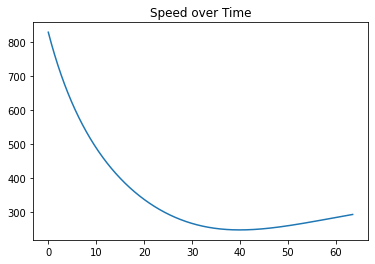

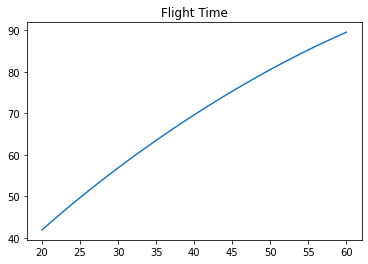

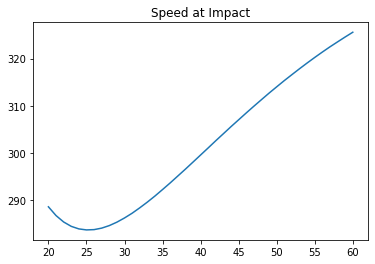

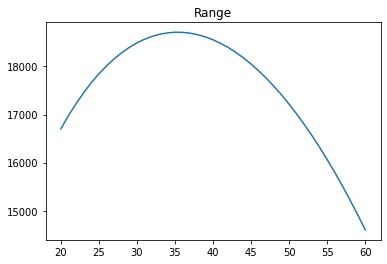

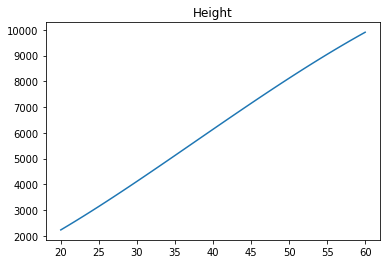

In [ ]:
def GraphVel(theta):
  Vo = 830
  Vx = Vo*math.cos(theta)
  Vy = Vo*math.sin(theta)
  V = math.sqrt(Vx**2 + Vy**2)

  Speed = [Vo]
  Time = [0]
  X = [0]
  Y = [0]
  t = .01
  while (Y[len(Y)-1] >= 0):
    X.append(X[len(X)-1] + Vx*t)
    Y.append(Y[len(Y)-1] + Vy*t)
    #print(X[len(X)-1])
    #print(Y[len(Y)-1])
    Vx = Vx - (B(row,dragC,area)/mass)*V*Vx*t
    Vy = Vy - (B(row,dragC,area)/mass)*V*Vy*t - g*t
    V = math.sqrt(Vx**2 + Vy**2)

    Speed.append(V)
    Time.append(Time[len(Time)-1]+t)

  plt.plot(Time,Speed)
  #print(Time)

GraphVel(math.radians(Thetamax))
plt.title("Speed over Time")
plt.show()

plt.title("Flight Time")
plt.plot(Angles,FlightT)
plt.show()

plt.title("Speed at Impact")
plt.plot(Angles,SImpact)
plt.show()

plt.title("Range")
plt.plot(Angles,Range)
plt.show()

plt.title("Height")
plt.plot(Angles,Height)
plt.show()
